In [2]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
library(tidyverse); 
library(lubridate); 
library(scales);
library(magrittr); 
library(dplyr);
})

In [3]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [4]:
options(repr.plot.width = 15, repr.plot.height = 10)

# Introduction

__April 20, 2022__  
__May 2, 2022__. 


[Parent QA ticket](https://phabricator.wikimedia.org/T305442) | [QA ticket](https://phabricator.wikimedia.org/T306558)

schema: https://schema.wikimedia.org/repositories//secondary/jsonschema/analytics/mediawiki/web_ui_reading_depth/current.yaml

# Instrumentation note
The related events will be stored in schema mediawiki_reading_depth, identified by session_token




# QA mediawiki_reading_depth schema

## By wikis

QAed on April 20, 2022, events are only avaiable for enwiki

In [116]:
query <- 
"
SELECT meta.domain,  COUNT(1) AS events, 
COUNT(DISTINCT session_token) AS session_tokens
FROM event.mediawiki_reading_depth 
WHERE year = 2022 AND month=4
GROUP BY meta.domain
"

In [117]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [118]:
df

domain,events,session_tokens
<chr>,<int>,<int>
en.jinzhao.wiki,5,4
en.wiki.hancel.org,287,10
en.wikipedia.org,6209887,1360192
en.wikipedia.ahau.cf,1,1
en.wikipedia.ahmu.cf,107,2
en.wikipedia.xn--3js309f.xn--kpry57d,2,1
en.turkcewiki.org,2,1
en.wikipedia.iwiki.eu.org,141,12
en.wikipedia.iwiki.uk,323,5


QAed on May 2, 2022, events are avaiable for polit wikis since 2022-04-26.

'tr.wikipedia.org',
'vi.wikipedia.org',
'ary.wikipedia.org',
'fa.wikipedia.org',
'fr.wikipedia.org',
'pt.wikipedia.org',
'en.wikipedia.org',
'foundation.wikimedia.org',
'ko.wikipedia.org',
'fr.wiktionary.org',
'he.wikipedia.org',
'vi.wikibooks.org',
'bn.wikipedia.org',
'de.wikivoyage.org',
'en.turkcewiki.org',
'fr.wikiquote.org',
'pt.wikiversity.org',
'id.wikipedia.org',
'pt.wikinews.org',
'eu.wikipedia.org',
'incubator.wikimedia.org',
'pl.wikinews.org',
'sr.wikipedia.org',
'th.wikipedia.org',
'vec.wikipedia.org',
'www.mediawiki.org',
'www.turkcewiki.org',
'www.turkcewiki.org'


24 of them are polits wikis:

'tr.wikipedia.org',
'vi.wikipedia.org',
'ary.wikipedia.org',
'fa.wikipedia.org',
'fr.wikipedia.org',
'pt.wikipedia.org',
'foundation.wikimedia.org',
'ko.wikipedia.org',
'fr.wiktionary.org',
'he.wikipedia.org',
'vi.wikibooks.org',
'bn.wikipedia.org',
'de.wikivoyage.org',
'fr.wikiquote.org',
'pt.wikiversity.org',
'id.wikipedia.org',
'pt.wikinews.org',
'eu.wikipedia.org',
'incubator.wikimedia.org',
'pl.wikinews.org',
'sr.wikipedia.org',
'th.wikipedia.org',
'vec.wikipedia.org',
'www.mediawiki.org',

In [1]:
query <- 
"
SELECT meta.domain,  COUNT(1) AS events, 
COUNT(DISTINCT session_token) AS session_tokens
FROM event.mediawiki_reading_depth 
WHERE year = 2022 AND month in (4,5)
GROUP BY meta.domain
"

In [5]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [6]:
df

domain,events,session_tokens
<chr>,<int>,<int>
ko.wikipedia.xn--3js309f.xn--kpry57d,2,1
test2.wikipedia.org,10,7
th.wikipedia.iwiki.eu.org,4,1
tr.wikipedia.org,302729,90053
vi.wikipedia.org,137293,46879
ary.wikipedia.org,100,47
en.wikipedia.iwiki.eu.org,178,14
fa.wikipedia.org,551344,117064
fr.wikipedia.org,1556759,426272


## By date

In [57]:
query <- 
"
SELECT meta.domain, min(meta.dt)
FROM event.mediawiki_reading_depth
WHERE year=2022 AND month IN (4, 5)
GROUP BY meta.domain
"

In [16]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [17]:
df

domain,X_c1
<chr>,<chr>
ko.wikipedia.xn--3js309f.xn--kpry57d,2022-04-28T04:28:56.901Z
test2.wikipedia.org,2022-04-27T17:55:20.713Z
th.wikipedia.iwiki.eu.org,2022-04-30T02:45:40.278Z
tr.wikipedia.org,2022-04-26T20:25:55.479Z
vi.wikipedia.org,2022-04-26T20:27:51.823Z
ary.wikipedia.org,2022-04-26T20:36:57.000Z
en.wikipedia.iwiki.eu.org,2022-04-01T12:33:33.983Z
fa.wikipedia.org,2022-04-26T20:29:15.001Z
fr.wikipedia.org,2022-04-26T20:25:23.518Z


In [18]:
query <- 
"
SELECT TO_DATE(meta.dt),  year, month,day, COUNT(1) AS events, 
COUNT(DISTINCT session_token) AS sessions
FROM event.mediawiki_reading_depth
WHERE year=2022 AND month IN (4, 5)
AND meta.domain= 'fr.wikipedia.org'
GROUP BY TO_DATE(meta.dt),year, month,day
"

In [13]:
df_date <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [14]:
df_date

X_c0,year,month,day,events,sessions
<chr>,<int>,<int>,<int>,<int>,<int>
2022-04-29,2022,4,29,260969,75220
2022-05-01,2022,5,1,278308,79832
2022-04-27,2022,4,27,277719,78532
2022-04-30,2022,4,30,244298,71588
2022-05-02,2022,5,2,206188,58340
2022-04-28,2022,4,28,265972,76777
2022-04-26,2022,4,26,40212,11942


__Note__

The events are avaible on polit wikis since 2022-04-26

# By namespace

In [54]:
query <- 
"
SELECT page_namespace, COUNT(1) AS events, 
COUNT(DISTINCT session_token) AS sessions
FROM event.mediawiki_reading_depth
WHERE year=2022 and month IN (4 ,5)
AND meta.domain IN (
'tr.wikipedia.org',
'vi.wikipedia.org',
'ary.wikipedia.org',
'fa.wikipedia.org',
'fr.wikipedia.org',
'pt.wikipedia.org',
'foundation.wikimedia.org',
'ko.wikipedia.org',
'fr.wiktionary.org',
'he.wikipedia.org',
'vi.wikibooks.org',
'bn.wikipedia.org',
'de.wikivoyage.org',
'fr.wikiquote.org',
'pt.wikiversity.org',
'id.wikipedia.org',
'pt.wikinews.org',
'eu.wikipedia.org',
'incubator.wikimedia.org',
'pl.wikinews.org',
'sr.wikipedia.org',
'th.wikipedia.org',
'vec.wikipedia.org',
'www.mediawiki.org'
)
GROUP BY page_namespace
ORDER BY page_namespace
LIMIT 100000
"

In [55]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [56]:
df

page_namespace,events,sessions
<int>,<int>,<int>
-1,54383,11404
0,3848007,1100523
1,2914,729
2,3686,470
3,1792,328
4,40549,13233
5,176,55
6,20784,9459
7,11,5


# BY user type: anonymous users and logged-in users

In [58]:
query <- 
"
SELECT is_anon, COUNT(1) AS events, 
COUNT(DISTINCT session_token) AS sessions
FROM event.mediawiki_reading_depth
WHERE year=2022 AND month IN (4,5)
AND meta.domain IN (
'tr.wikipedia.org',
'vi.wikipedia.org',
'ary.wikipedia.org',
'fa.wikipedia.org',
'fr.wikipedia.org',
'pt.wikipedia.org',
'foundation.wikimedia.org',
'ko.wikipedia.org',
'fr.wiktionary.org',
'he.wikipedia.org',
'vi.wikibooks.org',
'bn.wikipedia.org',
'de.wikivoyage.org',
'fr.wikiquote.org',
'pt.wikiversity.org',
'id.wikipedia.org',
'pt.wikinews.org',
'eu.wikipedia.org',
'incubator.wikimedia.org',
'pl.wikinews.org',
'sr.wikipedia.org',
'th.wikipedia.org',
'vec.wikipedia.org',
'www.mediawiki.org'
)
GROUP BY is_anon
LIMIT 100000
"

In [59]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [60]:
df

is_anon,events,sessions
<chr>,<int>,<int>
false,81673,3437
true,3960279,1114739


# By action

In [61]:
query <- 
"
SELECT action, COUNT(1) AS events, 
COUNT(DISTINCT session_token) AS sessions
FROM event.mediawiki_reading_depth
WHERE year=2022 AND month IN (4,5)
AND meta.domain IN (
'tr.wikipedia.org',
'vi.wikipedia.org',
'ary.wikipedia.org',
'fa.wikipedia.org',
'fr.wikipedia.org',
'pt.wikipedia.org',
'foundation.wikimedia.org',
'ko.wikipedia.org',
'fr.wiktionary.org',
'he.wikipedia.org',
'vi.wikibooks.org',
'bn.wikipedia.org',
'de.wikivoyage.org',
'fr.wikiquote.org',
'pt.wikiversity.org',
'id.wikipedia.org',
'pt.wikinews.org',
'eu.wikipedia.org',
'incubator.wikimedia.org',
'pl.wikinews.org',
'sr.wikipedia.org',
'th.wikipedia.org',
'vec.wikipedia.org',
'www.mediawiki.org'
)
GROUP BY action
LIMIT 100000
"


In [62]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [63]:
df

action,events,sessions
<chr>,<int>,<int>
pageLoaded,2432788,1115318
pageUnloaded,1609164,529527


__Note:__  

Two types of actions are recorded: pageLoaded, pageUnloaded

# By page_length

In [64]:
query <- 
"
SELECT page_length, COUNT(1) AS events, 
COUNT(DISTINCT session_token) AS sessions
FROM event.mediawiki_reading_depth
WHERE year=2022 AND month IN (4,5)
AND meta.domain IN (
'tr.wikipedia.org',
'vi.wikipedia.org',
'ary.wikipedia.org',
'fa.wikipedia.org',
'fr.wikipedia.org',
'pt.wikipedia.org',
'foundation.wikimedia.org',
'ko.wikipedia.org',
'fr.wiktionary.org',
'he.wikipedia.org',
'vi.wikibooks.org',
'bn.wikipedia.org',
'de.wikivoyage.org',
'fr.wikiquote.org',
'pt.wikiversity.org',
'id.wikipedia.org',
'pt.wikinews.org',
'eu.wikipedia.org',
'incubator.wikimedia.org',
'pl.wikinews.org',
'sr.wikipedia.org',
'th.wikipedia.org',
'vec.wikipedia.org',
'www.mediawiki.org'
)
GROUP BY page_length
ORDER BY page_length
LIMIT 100000
"

In [65]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [66]:
df

page_length,events,sessions
<int>,<int>,<int>
-1,50,31
0,86353,24021
1,424,93
2,1,1
6,4,3
8,67,5
9,2,1
10,288,47
20,1936,257


# By access method

In [67]:
query <- 
"
SELECT access_method, COUNT(1) AS events, 
COUNT(DISTINCT session_token) AS sessions
FROM event.mediawiki_reading_depth
WHERE year=2022 AND month IN (4,5)
AND meta.domain IN (
'tr.wikipedia.org',
'vi.wikipedia.org',
'ary.wikipedia.org',
'fa.wikipedia.org',
'fr.wikipedia.org',
'pt.wikipedia.org',
'foundation.wikimedia.org',
'ko.wikipedia.org',
'fr.wiktionary.org',
'he.wikipedia.org',
'vi.wikibooks.org',
'bn.wikipedia.org',
'de.wikivoyage.org',
'fr.wikiquote.org',
'pt.wikiversity.org',
'id.wikipedia.org',
'pt.wikinews.org',
'eu.wikipedia.org',
'incubator.wikimedia.org',
'pl.wikinews.org',
'sr.wikipedia.org',
'th.wikipedia.org',
'vec.wikipedia.org',
'www.mediawiki.org'
)
GROUP BY access_method
LIMIT 100000
"

In [68]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [69]:
df

access_method,events,sessions
<chr>,<int>,<int>
desktop,1300196,253933
mobile web,2779901,874053


__Note:__

Two types of access methods are recorded: desktop, mobile web

# By agent type

In [70]:
query <- "
SELECT CASE WHEN user_agent_map['device_family']='Spider' THEN 'Spider' ELSE 'User' END AS agent_type,
COUNT(1) AS events,
COUNT(DISTINCT session_token) AS sessions
FROM event.mediawiki_reading_depth
WHERE year=2022 AND month IN (4,5)
AND meta.domain IN (
'tr.wikipedia.org',
'vi.wikipedia.org',
'ary.wikipedia.org',
'fa.wikipedia.org',
'fr.wikipedia.org',
'pt.wikipedia.org',
'foundation.wikimedia.org',
'ko.wikipedia.org',
'fr.wiktionary.org',
'he.wikipedia.org',
'vi.wikibooks.org',
'bn.wikipedia.org',
'de.wikivoyage.org',
'fr.wikiquote.org',
'pt.wikiversity.org',
'id.wikipedia.org',
'pt.wikinews.org',
'eu.wikipedia.org',
'incubator.wikimedia.org',
'pl.wikinews.org',
'sr.wikipedia.org',
'th.wikipedia.org',
'vec.wikipedia.org',
'www.mediawiki.org'
)
GROUP BY CASE WHEN user_agent_map['device_family']='Spider' THEN 'Spider' ELSE 'User' END
LIMIT 100000
"

In [71]:
df <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit



In [72]:
df

agent_type,events,sessions
<chr>,<int>,<int>
Spider,51,30
User,4080046,1127954


__Note:__

We can identify and exclude spider in analysis

# Read length Distribution

`total_length`(in milliseconds) tracks from the `visibility_listeners_time` to the point at which the page is unloaded. It means tracking whether the user has the page visible or not to the moment the user leaves the page. 

Note that this time may include time that the user has the page hidden.


In [84]:
query_total_length <- 
"
SELECT MAX(total_length) AS max, MIN(total_length) AS min, Avg(total_length) AS avg, STDDEV(total_length) AS stdev, COUNT(1) AS count
,
percentile(total_length, 0.5) AS 50_percentile, percentile(total_length,  0.75) AS 75_percentile, 
percentile(total_length,  0.99) AS 99_percentile
FROM event.mediawiki_reading_depth
WHERE year=2022 AND month IN (4,5) 
AND total_length is not NULL
AND meta.domain IN (
'tr.wikipedia.org',
'vi.wikipedia.org',
'ary.wikipedia.org',
'fa.wikipedia.org',
'fr.wikipedia.org',
'pt.wikipedia.org',
'foundation.wikimedia.org',
'ko.wikipedia.org',
'fr.wiktionary.org',
'he.wikipedia.org',
'vi.wikibooks.org',
'bn.wikipedia.org',
'de.wikivoyage.org',
'fr.wikiquote.org',
'pt.wikiversity.org',
'id.wikipedia.org',
'pt.wikinews.org',
'eu.wikipedia.org',
'incubator.wikimedia.org',
'pl.wikinews.org',
'sr.wikipedia.org',
'th.wikipedia.org',
'vec.wikipedia.org',
'www.mediawiki.org')
AND user_agent_map['device_family']!='Spider'
"

In [85]:
df <- wmfdata::query_hive(query_total_length)

Don't forget to authenticate with Kerberos using kinit



__Excluding spider__

In [86]:
df

max,min,avg,stdev,count,X50_percentile,X75_percentile,X99_percentile
<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
506430627,0,608963.2,7121651,1623944,29111.5,101774.5,8808603


__including spider__

In [81]:
df

max,min,avg,stdev,count,X50_percentile,X75_percentile,X99_percentile
<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
506430627,0,608955.1,7121603,1623966,29111,101771,8808276


__Note:__

For all events in 2022.4 ~ 2022.5 excluding spiders, the average reading length is 1623944 MS, median is 29111 MS.  

There is no big difference between including spiders and excluding spiders.  


In [46]:
query_total_length <- 
"
SELECT total_length, session_token
FROM event.mediawiki_reading_depth
WHERE year=2022 AND month IN (4,5)
AND total_length is not NULL
AND meta.domain IN (
'tr.wikipedia.org',
'vi.wikipedia.org',
'ary.wikipedia.org',
'fa.wikipedia.org',
'fr.wikipedia.org',
'pt.wikipedia.org',
'foundation.wikimedia.org',
'ko.wikipedia.org',
'fr.wiktionary.org',
'he.wikipedia.org',
'vi.wikibooks.org',
'bn.wikipedia.org',
'de.wikivoyage.org',
'fr.wikiquote.org',
'pt.wikiversity.org',
'id.wikipedia.org',
'pt.wikinews.org',
'eu.wikipedia.org',
'incubator.wikimedia.org',
'pl.wikinews.org',
'sr.wikipedia.org',
'th.wikipedia.org',
'vec.wikipedia.org',
'www.mediawiki.org'
)
"


In [47]:
df <- wmfdata::query_hive(query_total_length)

Don't forget to authenticate with Kerberos using kinit



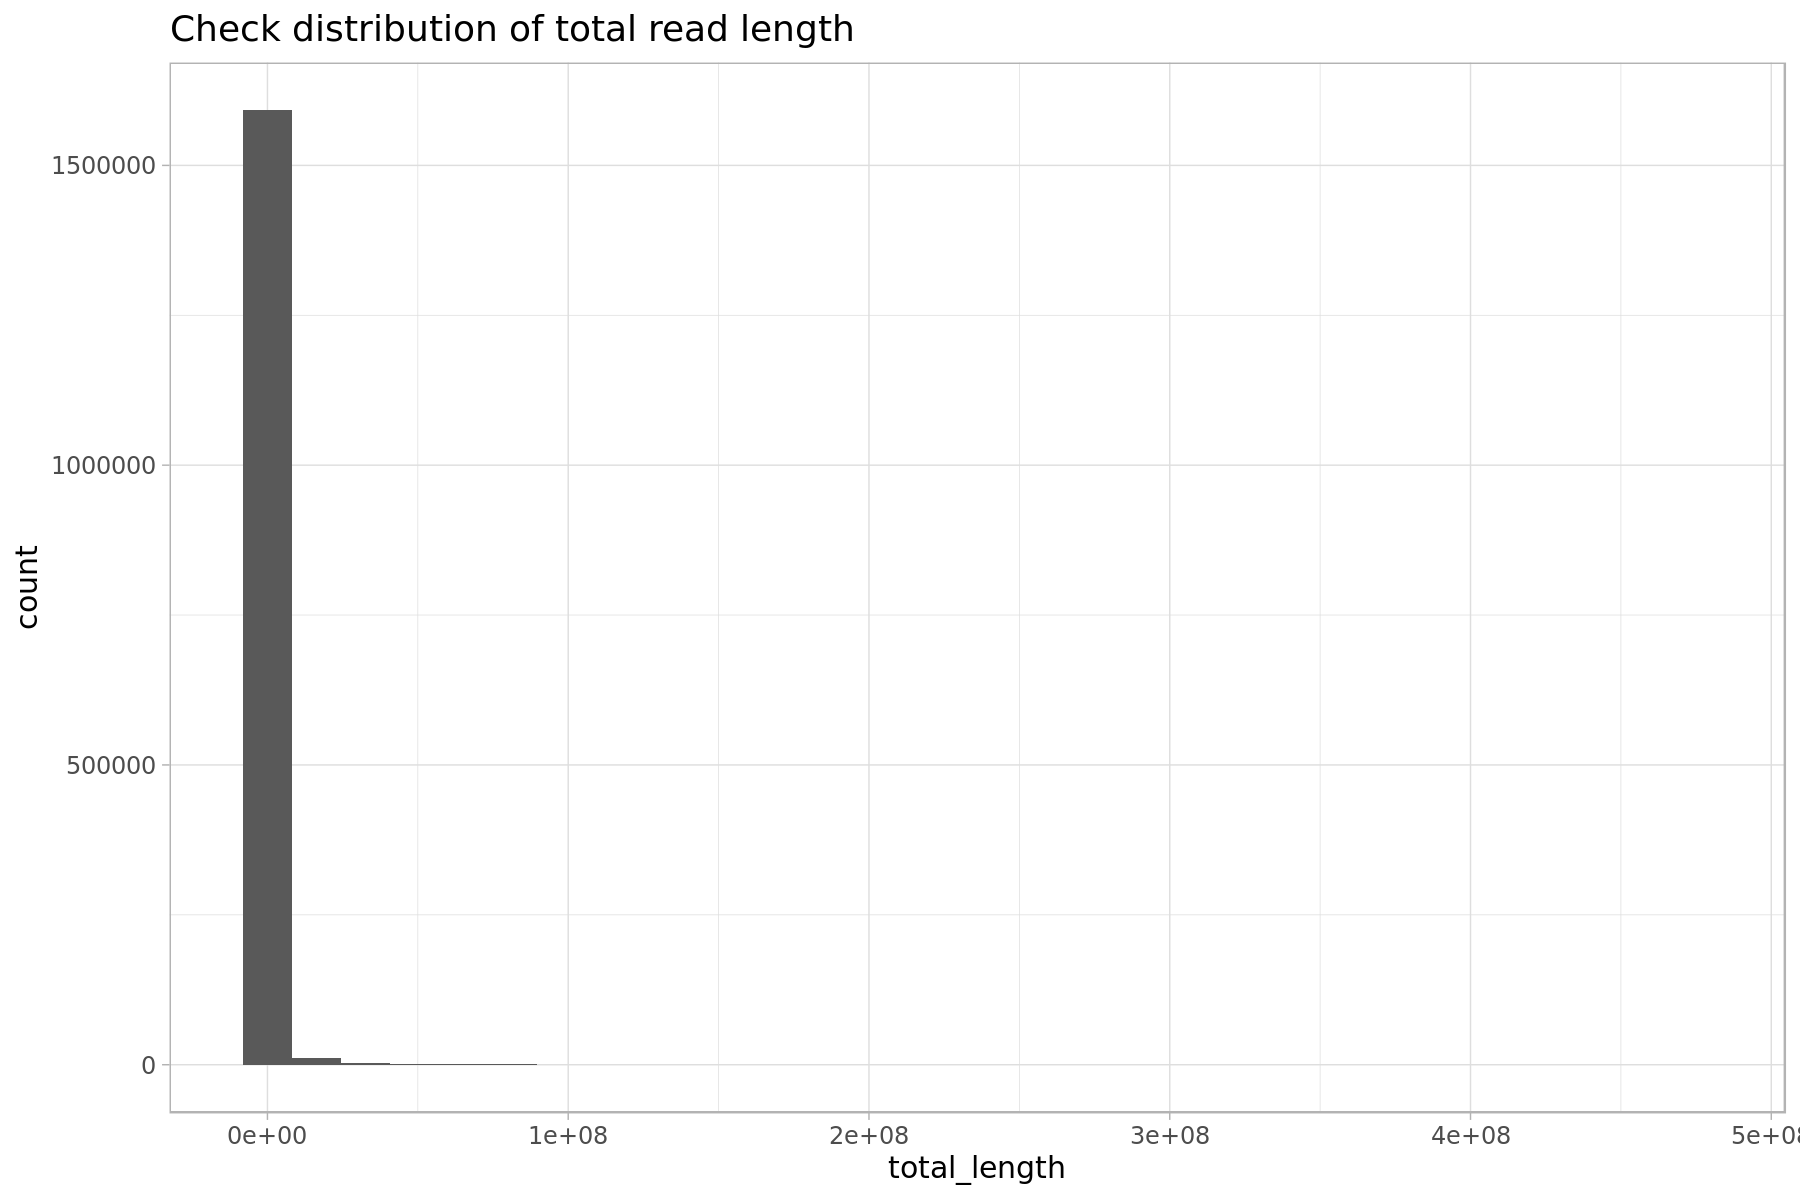

In [50]:
p1 <- df %>%
  ggplot( mapping=aes(x=total_length)) +
    geom_histogram(bins=30 ) +
    labs ( title = "Check distribution of total read length",
         fill="") +
    theme_light(base_size=18)
p1

In [48]:
p <- df %>%
  ggplot( mapping=aes(x=total_length)) +
    geom_histogram(bins=30 ) +
    scale_x_log10() +
    labs ( title = "Check distribution of total read length",
         fill="") +
    theme_light(base_size=18)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


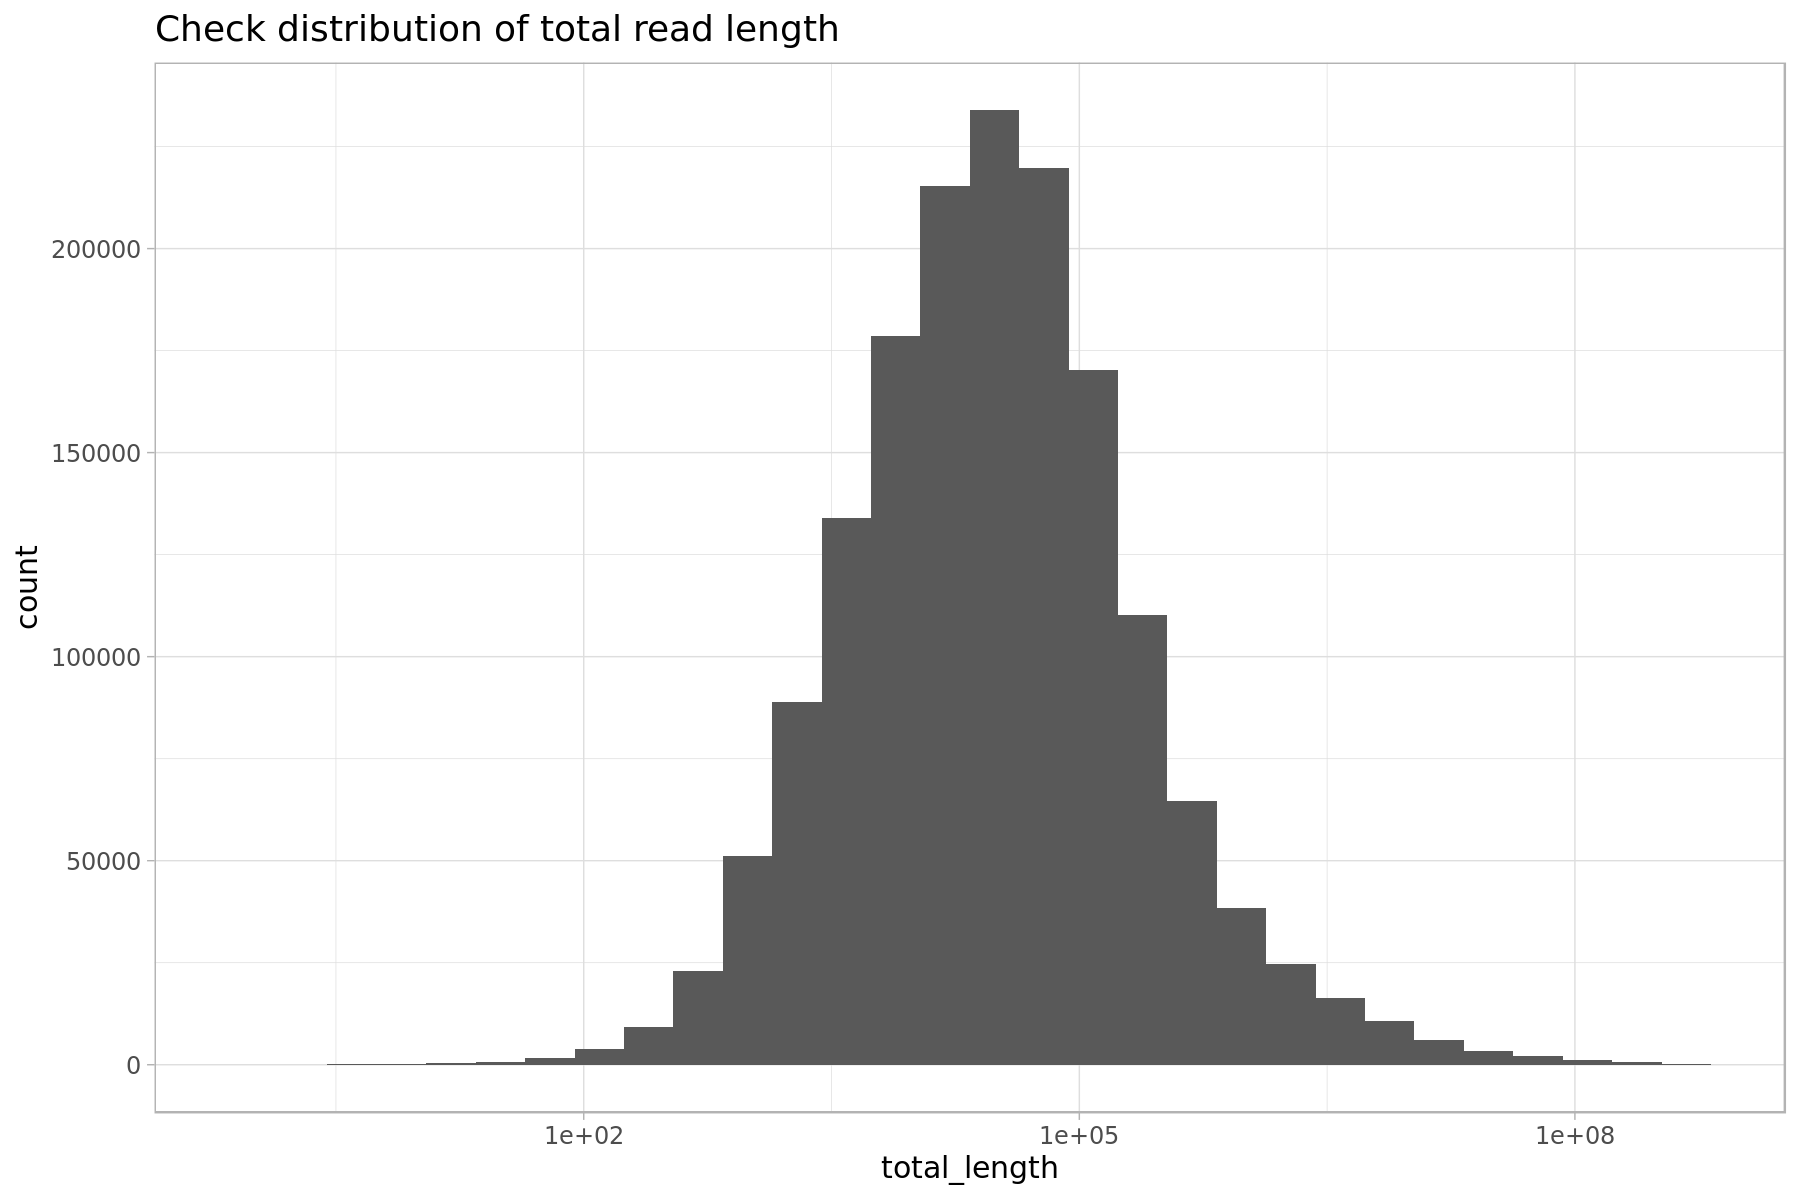

In [49]:
p

In [51]:
ggsave("reading_length_log_distribution.png",
    plot = p, width = 60, height = 30, units = "cm", dpi = "screen");

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


__Note__


The reading length in log is in a bell shape.

## Check whether schemas can be joined by session token

### Joined with ab

In [109]:
query <- "
SELECT meta.domain, meta.dt,  web_session_id
FROM  event.mediawiki_web_ui_scroll
WHERE year=2022 and month=4 and day=18
AND action='scroll-to-toc'
LIMIT 20
"

In [110]:
df_1 <- wmfdata::query_hive(query)

Don't forget to authenticate with Kerberos using kinit

